**Linear Regression:**

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

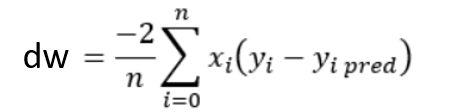

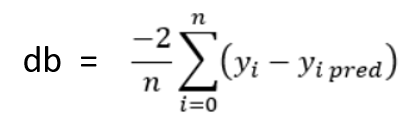

In [ ]:
# importing numpy library
import numpy as np

**Linear Regression**

In [ ]:
class Linear_Regression():

  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    self.m, self.n = X.shape # splitting into number of training points and number of features

    # initiating the weight and bias

    self.w = np.zeros(self.n) # dataset may contain many features- each feature has a weight associated
    self.b = 0  # model has only one bias
    self.X = X
    self.Y = Y

    # implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self, X):

    return X.dot(self.w) + self.b








Using Linear Regression model for Prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-Processing

In [ ]:
# Loading the data from CSV file to a Pandas Dataframe.
salary_data = pd.read_csv('/content/sample_data/salary_data.csv')

In [ ]:
# First 5 rows of the Dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
# Last 5 rows of the Dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
# Number of rows & columns in the Dataframe
salary_data.shape

(30, 2)

In [ ]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting the feature and target variable

In [ ]:
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, -1].values

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training and testing data

In [21]:
# X_train - Features on which model will be trained
# X_test - Features on which model will be tested
# Y_train - Target/Output for the X_train
# Y_test - Target values for the X_test
# test_size - Percent of data seperated from the dataset for testing the model
# random_state - makes randomness repeatable

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state= 42)

Training the Linear Regression model

In [22]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [23]:
model.fit(X_train, Y_train)

Predicting salary value for the test data

In [24]:
test_data_prediction = model.predict(X_test)

In [25]:
print(test_data_prediction)

[115816.40674702  71510.94876087 102619.03628306  75281.62603628
  55485.57034034  60198.91693461 122415.091979   107332.38287733
  63026.92489118  35689.5146444 ]


Visualizing the predicted values & actual values

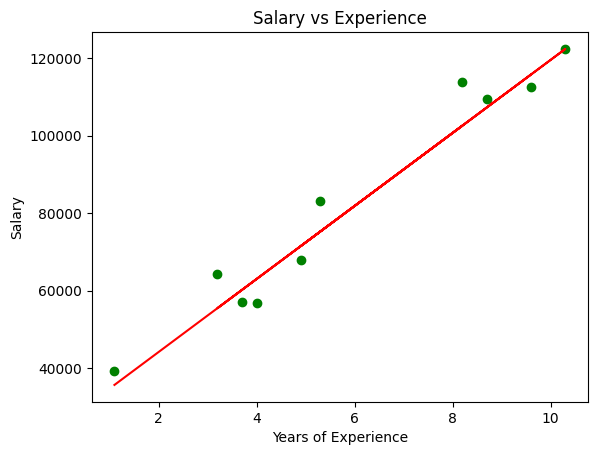

In [26]:
plt.scatter(X_test, Y_test, color='green')
plt.plot(X_test, test_data_prediction, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()
